In [1]:
import torch

from train_supervision import *

config = py2cfg('config/potsdam/ftunetformer.py')
model = Supervision_Train.load_from_checkpoint(os.path.join(config.weights_path, config.test_weights_name+'-v3.ckpt'), config=config)

C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
C:\Users\6160-04\PycharmProjects\GeoSeg\venv\lib\site-packages\torch\functional.py:504: UserWarning:

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)



In [2]:

model.cuda()
model.eval()

Supervision_Train(
  (net): FTUNetFormer(
    (backbone): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): ModuleList(
        (0): BasicLayer(
          (blocks): ModuleList(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (

In [3]:
from torchvision.transforms import transforms
from geoseg.datasets.potsdam_dataset import val_aug
import albumentations as albu

transform = albu.Compose([
        # albu.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25, p=0.15),
        # albu.RandomRotate90(p=0.25),
        albu.Normalize(),
        albu.Resize(224,224)
    ])

In [4]:
from PIL import Image
import cv2
import numpy as np

img = Image.open('data/test_img/TEST_00006.png')
img = np.array(img)
img = transform(image=img)['image']
mask = cv2.imread('data/annotations/val/TRAIN_0002.png', cv2.IMREAD_GRAYSCALE)

In [22]:
img

array([[[-0.2855553 , -0.24999997,  0.19991288],
        [-0.8506722 , -0.53011197, -0.04409584],
        [-0.9362959 , -0.617647  , -0.11381261],
        ...,
        [-1.3301653 , -0.897759  , -0.60183   ],
        [-1.34729   , -0.91526604, -0.6366884 ],
        [-1.34729   , -0.91526604, -0.6366884 ]],

       [[-0.18280679, -0.10994395,  0.32191724],
        [-0.8506722 , -0.53011197, -0.09638342],
        [-1.0904187 , -0.77521   , -0.32296294],
        ...,
        [-1.5527871 , -1.12535   , -0.82840955],
        [-1.5699118 , -1.1428571 , -0.8458387 ],
        [-1.5699118 , -1.1428571 , -0.8458387 ]],

       [[-0.23418106, -0.14495796,  0.26962966],
        [-0.9362959 , -0.60014   , -0.20095858],
        [-1.1931672 , -0.86274505, -0.4449673 ],
        ...,
        [-1.5185375 , -1.0903361 , -0.79355115],
        [-1.5699118 , -1.1428571 , -0.8458387 ],
        [-1.5699118 , -1.1428571 , -0.8458387 ]],

       ...,

       [[ 0.7076804 ,  0.99299717,  1.3328104 ],
        [ 0

In [7]:
model.cuda()

SegmentationTTAWrapper(
  (model): Supervision_Train(
    (net): FTUNetFormer(
      (backbone): SwinTransformer(
        (patch_embed): PatchEmbed(
          (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        )
        (pos_drop): Dropout(p=0.0, inplace=False)
        (layers): ModuleList(
          (0): BasicLayer(
            (blocks): ModuleList(
              (0): SwinTransformerBlock(
                (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
                (attn): WindowAttention(
                  (qkv): Linear(in_features=128, out_features=384, bias=True)
                  (attn_drop): Dropout(p=0.0, inplace=False)
                  (proj): Linear(in_features=128, out_features=128, bias=True)
                  (proj_drop): Dropout(p=0.0, inplace=False)
                  (softmax): Softmax(dim=-1)
                )
                (drop_path): Identity()
                (

In [37]:
img = Image.open('data/test_img/TEST_00153.png')
img = np.array(img)
img = transform(image=img)['image']
img = torch.from_numpy(img).unsqueeze(0).permute(0,3, 1, 2).float().cuda()
print(img.size())
a = model(img)

torch.Size([1, 3, 224, 224])


C:\Users\6160-04\AppData\Local\Temp\ipykernel_37592\4179392976.py:20: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



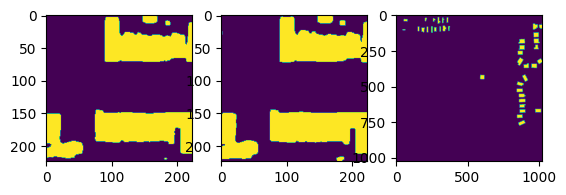

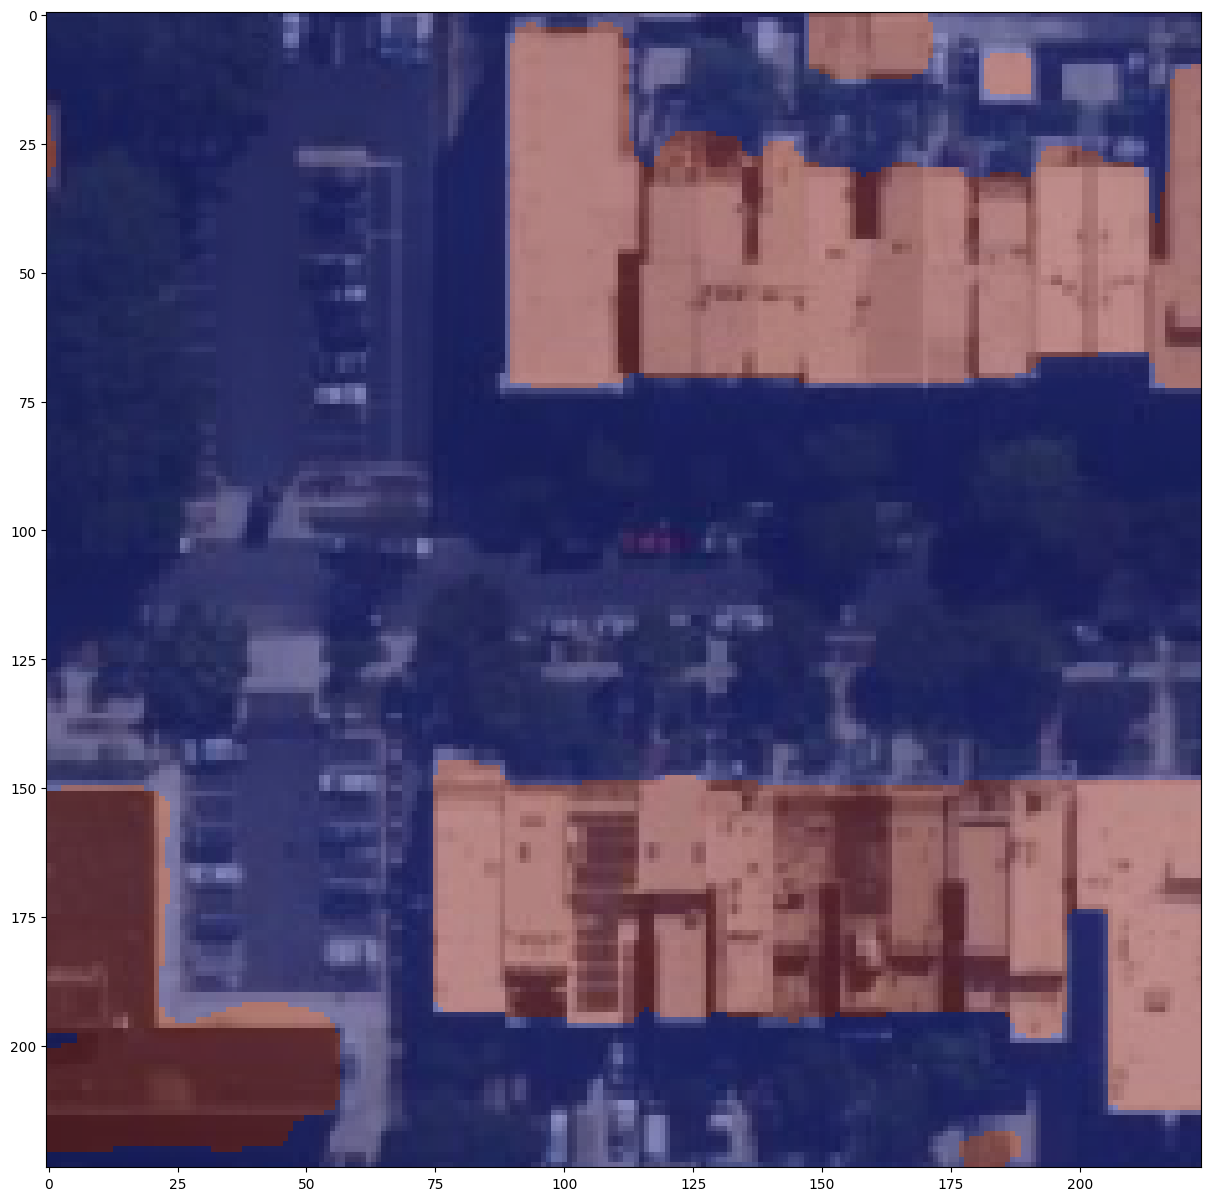

In [38]:
#pyplot a
import matplotlib.pyplot as plt

#plt.imshow(a[0][5].cpu().detach().numpy())
#show all a[0][0] to a[0][7] in subplot 2 * 4
# for i in range(8):
#     plt.subplot(2,4,i+1)
#     plt.imshow(a[0][i].cpu().detach().numpy())
# show bar about value
#plt.colorbar()
#remain only 0 upper value
new_a = (a[0][1] - a[0][0])
predictions = torch.sigmoid(new_a).cpu().detach().numpy()
predictions2 = torch.sigmoid(a[0][1]).cpu().detach().numpy()
predictions2 = (predictions > 0.55).astype(np.uint8)
predictions = (predictions > 0.5).astype(np.uint8)
# compare with mask
plt.imshow(mask)
# show both 2 image using subplot
plt.subplot(1,3,1)
plt.imshow(predictions2, vmin=0, vmax=1)
plt.subplot(1,3,2)
plt.imshow(predictions)
plt.subplot(1,3,3)
plt.imshow(mask)

fig, ax = plt.subplots(figsize=(15, 15))
# RGB mode
# resize to 224 224
predictions = cv2.resize(predictions, (224, 224))
temp = Image.open(f'data/test_img/TEST_00153.png', mode='r').convert('RGB')
temp = np.array(temp)
ax.imshow(temp)
ax.imshow(predictions, alpha=0.4, cmap="jet")
#remain only 0 upper value



In [9]:
#get dice score between mask and prediction
from tools.metric import Evaluator
evalu = Evaluator(2)
mask = Image.open('data/annotations/val/TRAIN_0002.png')
mask = np.array(mask)
mask[mask > 0] = 1.
evalu.add_batch(mask,predictions)
print(evalu.confusion_matrix)
print(evalu.Dice())



AssertionError: pre_image shape (224, 224), gt_image shape (1024, 1024)

In [ ]:
predictions

In [9]:
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [10]:
# RLE 인코딩 함수
def rle_encode(mask):
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [11]:
import ttach as tta
TTA_transform = tta.Compose(
    [
        tta.HorizontalFlip(),
        tta.Rotate90(angles=[0, 180]),
        tta.Scale(scales=[1, 2]),
    ]
)
model = tta.SegmentationTTAWrapper(model, TTA_transform, merge_mode='mean').cuda()

In [39]:
#make image dataset that return only image in /data/test_img
from torch.utils.data import Dataset
from PIL import Image
import os
import numpy as np
import cv2
class ImageDataset(Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(root, "test_img"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "test_img", self.imgs[idx])
        img = Image.open(img_path)
        img = np.array(img)
        img = transform(image=img)['image']
        img = torch.from_numpy(img).permute(2, 0, 1)
        return img
    def __len__(self):
        return len(self.imgs)
img_test = ImageDataset('data', transform)
img_test[10].shape

torch.Size([3, 224, 224])

In [40]:
test_loader = torch.utils.data.DataLoader(
    img_test, batch_size=1, shuffle=False, num_workers=0, pin_memory=False
)

In [42]:
from tqdm import tqdm
import matplotlib.pyplot as plt

with torch.no_grad():
    with torch.inference_mode():
        model.eval()
        result = []
        for inx, images in enumerate(tqdm(test_loader)):
            images = images.float().cuda()
            outputs = model(images)

            new_outputs = outputs[:,1,:,:] - outputs[:,0,:,:]
            predictions = torch.sigmoid(new_outputs).cpu().detach().numpy()
            predictions = (predictions > 0.5).astype(np.uint8)
            #for every 1000 images, show image and mask
            if inx % 100 == 0:
                fig, ax = plt.subplots(figsize=(15, 15))
                # RGB mode
                temp = Image.open(f'data/test_img/TEST_{str(inx).zfill(5)}.png', mode='r').convert('RGB')
                temp = np.array(temp)
                ax.imshow(temp)
                ax.imshow(albu.Resize(224,224)(image=predictions[0])['image'], alpha=0.4, cmap="jet")

                #plt.show()
                fig.savefig(f"./pred_new_train/{inx}_predict_50ver.png")
                plt.close()
            for i in range(len(images)):
                outputs_transform = albu.Resize(224,224)(image=predictions[i])['image']
                mask_rle = rle_encode(outputs_transform)
                if mask_rle == '': # 예측된 건물 픽셀이 아예 없는 경우 -1
                    result.append(-1)
                else:
                    result.append(mask_rle)

100%|██████████| 60640/60640 [3:27:47<00:00,  4.86it/s]  


In [ ]:
print('a')

In [43]:
import pandas as pd

submit = pd.read_csv('./sample_submission.csv')
submit['mask_rle'] = result

In [44]:
submit.to_csv('./submit_ftUnetFormer_re_train_post_affine.csv', index=False)